In [6]:
import pandas as pd
import pandas_profiling
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
from functools import reduce
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.multivariate.manova as smanova

**IMPORT FROM CSV**

In [9]:
NY_data = pd.read_csv (r'NY_data.csv')
FL_data = pd.read_csv (r'FL_data.csv')
CA_data = pd.read_csv (r'CA_data.csv')
MA_data = pd.read_csv (r'MA_data.csv')
NY_data.drop('Unnamed: 0', inplace = True, axis=1)
FL_data.drop('Unnamed: 0', inplace = True, axis=1)
CA_data.drop('Unnamed: 0', inplace = True, axis=1)
MA_data.drop('Unnamed: 0', inplace = True, axis=1)

In [10]:
NY_data[["date"]] = NY_data[["date"]].apply(pd.to_datetime)
FL_data[["date"]] = FL_data[["date"]].apply(pd.to_datetime)
CA_data[["date"]] = CA_data[["date"]].apply(pd.to_datetime)
MA_data[["date"]] = MA_data[["date"]].apply(pd.to_datetime)

**DESCRIPTION DATA**

In [11]:
NY_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 5 columns):
date                 223 non-null datetime64[ns]
coal                 223 non-null float64
petroleum liquids    222 non-null float64
petroleum coke       220 non-null float64
natural gas          223 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 8.8 KB


In [12]:
NY_data = NY_data.dropna(axis = 0)
NY_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 222
Data columns (total 5 columns):
date                 219 non-null datetime64[ns]
coal                 219 non-null float64
petroleum liquids    219 non-null float64
petroleum coke       219 non-null float64
natural gas          219 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.3 KB


In [13]:
NYcoal_mean = NY_data['coal'].mean()
NYpetliq_mean = NY_data['petroleum liquids'].mean()
NYpetcoke_mean = NY_data['petroleum coke'].mean()
NYnatgas_mean = NY_data['natural gas'].mean()
NYcoal_std = NY_data['coal'].std()
NYpetliq_std = NY_data['petroleum liquids'].std()
NYpetcoke_std = NY_data['petroleum coke'].std()
NYnatgas_std = NY_data['natural gas'].std()

***ADD MONTH COLUMN, ADD SEASON COLUMN, and change COL Names***

In [15]:
NY_data["month"] = NY_data.date.apply(lambda x: pd.to_datetime(x).strftime('%m-%d-%Y')[0:2])
NY_data["month"]=NY_data["month"].astype(int)
NY_data['seasons'] = NY_data.month.apply(lambda x: 'spring' if x >=3 and x<=5  else ('summer' if x >= 6 and x<=8 else ('fall' if x >= 9 and x<=11 else 'winter')))
NY_data.rename(columns={'date':'date', 'coal': 'coal', 'petroleum liquids': 'petroleum_liquids', 'petroleum coke': 'petroleum_coke','natural gas': 'natural_gas', 'month': 'month', 'seasons':'seasons'},inplace = True)
NY_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 222
Data columns (total 7 columns):
date                 219 non-null datetime64[ns]
coal                 219 non-null float64
petroleum_liquids    219 non-null float64
petroleum_coke       219 non-null float64
natural_gas          219 non-null float64
month                219 non-null int64
seasons              219 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [16]:
NY_data

,date,coal,petroleum_liquids,petroleum_coke,natural_gas,month,seasons
0,2019-07-01,20.670,50.20193,0.000,55865.759,7,summer
1,2019-06-01,0.413,12.14224,0.000,32673.142,6,summer
2,2019-05-01,0.000,24.06632,0.000,23871.364,5,spring
3,2019-04-01,5.204,23.42744,0.000,24542.277,4,spring
4,2019-03-01,27.486,26.74117,0.000,26947.314,3,spring
5,2019-02-01,24.012,98.74642,0.000,28521.780,2,winter
6,2019-01-01,89.869,412.86716,0.000,30743.751,1,winter
8,2018-11-01,1.413,36.07378,0.000,30422.783,11,fall
9,2018-10-01,1.274,15.40310,0.000,33418.465,10,fall
10,2018-09-01,21.333,48.03584,0.000,40474.029,9,fall


**BOX PLOTTING --- FOLLOWED BY ANOVA TESTING**

(ASSUMING NORMAL DISTRIBUTION) 

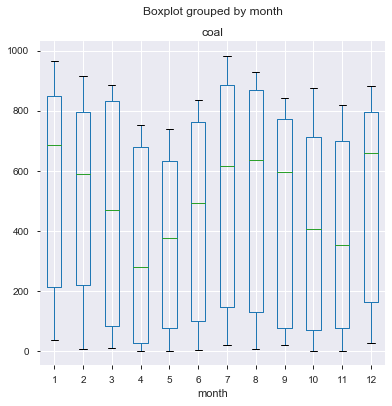

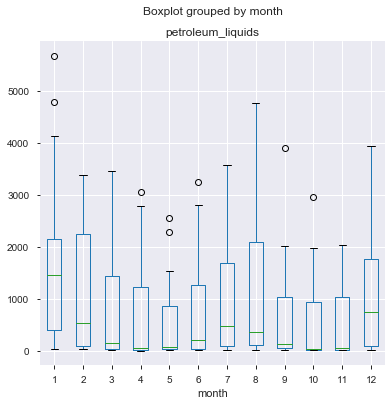

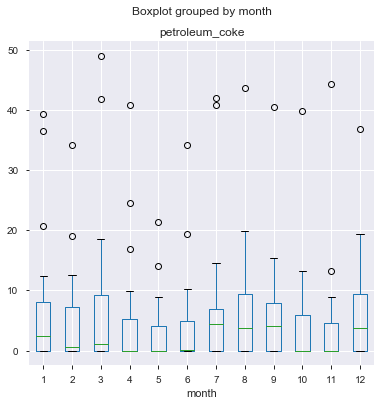

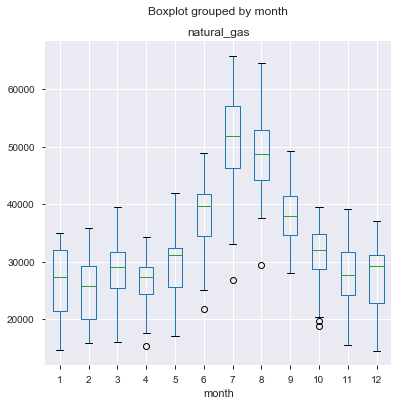

In [19]:
NY_data.boxplot('coal', by='month', figsize=(6,6))
NY_data.boxplot('petroleum_liquids', by='month', figsize=(6,6))
NY_data.boxplot('petroleum_coke', by='month', figsize=(6,6))
NY_data.boxplot('natural_gas', by='month', figsize=(6,6))

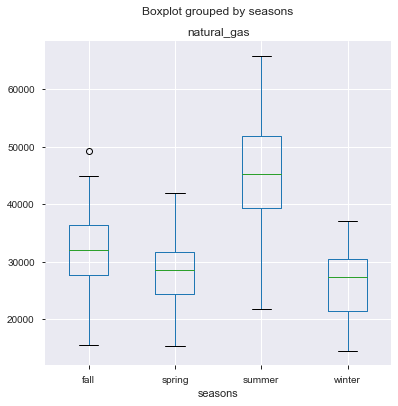

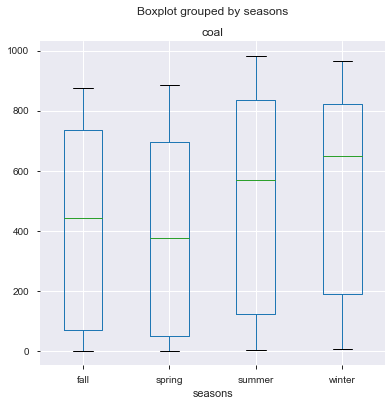

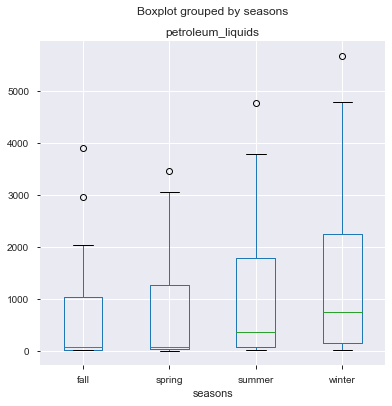

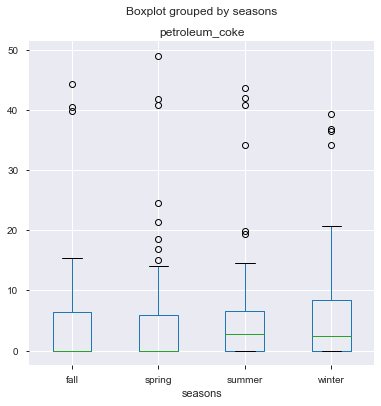

In [20]:
ng_box = NY_data.boxplot('natural_gas', by='seasons', figsize=(6,6))
coal_box = NY_data.boxplot('coal', by='seasons', figsize=(6,6))
pl_box = NY_data.boxplot('petroleum_liquids', by='seasons', figsize=(6,6))
pc_box = NY_data.boxplot('petroleum_coke', by='seasons', figsize=(6,6))

In [31]:
mod = ols('natural_gas~seasons',data=NY_data).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
seasons,3.0,1.232845e+10,4.109482e+09,70.610258,8.020431e-32
Residual,215.0,1.251289e+10,5.819950e+07,NaN,NaN


In [32]:
mod = ols('coal~seasons',data=NY_data).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
seasons,3.0,6.471229e+05,215707.637217,1.978564,0.118171
Residual,215.0,2.343980e+07,109022.303990,NaN,NaN


In [23]:
mod = ols('petroleum_liquids~seasons',data=NY_data).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
seasons,3.0,1.854568e+07,6.181894e+06,4.402288,0.00498
Residual,215.0,3.019129e+08,1.404246e+06,NaN,NaN


In [24]:
mod = ols('petroleum_coke~seasons',data=NY_data).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
seasons,3.0,35.881678,11.960559,0.109304,0.954597
Residual,215.0,23526.316430,109.424728,NaN,NaN


**MULTIVARIATE M-ANOVA**

In [33]:
formula = 'coal+petroleum_liquids+petroleum_coke+natural_gas~seasons'
mod = sm.MANOVA.from_formula(formula, data=NY_data)
r = mod.mv_test()
print(r)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1117 4.0000 212.0000 421.6265 0.0000
         Pillai's trace 0.8883 4.0000 212.0000 421.6265 0.0000
 Hotelling-Lawley trace 7.9552 4.0000 212.0000 421.6265 0.0000
    Roy's greatest root 7.9552 4.0000 212.0000 421.6265 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        seasons         Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3702 12.0000 561.1908 21.3213 0.0000
         Pillai's trace 0.6699 12.0000 642.0000 15.3801 0.0000
 Hotelling-

***TUKEY TEST***

In [26]:
print(pairwise_tukeyhsd(NY_data['coal'], NY_data['seasons']))


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
  fall spring -26.5346    0.9 -190.4899 137.4206  False
  fall summer  83.2239 0.5516  -81.4282  247.876  False
  fall winter  101.917 0.3883  -64.1967 268.0307  False
spring summer 109.7585 0.2925  -51.1055 270.6226  False
spring winter 128.4516 0.1738  -33.9081 290.8114  False
summer winter  18.6931    0.9 -144.3703 181.7565  False
-------------------------------------------------------


In [27]:
print(pairwise_tukeyhsd(NY_data['natural_gas'], NY_data['seasons']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  fall spring  -3742.1683 0.0542  -7530.3189     45.9823  False
  fall summer  13451.9547  0.001   9647.7027  17256.2068   True
  fall winter  -5545.9492 0.0013  -9383.9713  -1707.9271   True
spring summer  17194.1231  0.001  13477.3943  20910.8518   True
spring winter  -1803.7809 0.5872  -5555.0677    1947.506  False
summer winter -18997.9039  0.001 -22765.4497 -15230.3581   True
---------------------------------------------------------------


In [28]:
print(pairwise_tukeyhsd(NY_data['petroleum_liquids'], NY_data['seasons']))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
  fall spring 112.5412    0.9 -475.8812  700.9636  False
  fall summer 418.4149 0.2606 -172.5086 1009.3384  False
  fall winter 755.1804 0.0066  159.0113 1351.3494   True
spring summer 305.8737 0.5162 -271.4546   883.202  False
spring winter 642.6391 0.0242   59.9429 1225.3354   True
summer winter 336.7655 0.4467 -248.4563  921.9873  False
--------------------------------------------------------


In [29]:
print(pairwise_tukeyhsd(NY_data['petroleum_coke'], NY_data['seasons']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  fall spring   0.2897   0.9 -4.9045  5.484  False
  fall summer   0.9258   0.9 -4.2905 6.1422  False
  fall winter   0.9441   0.9 -4.3186 6.2068  False
spring summer   0.6361   0.9 -4.4603 5.7324  False
spring winter   0.6544   0.9 -4.4894 5.7981  False
summer winter   0.0183   0.9 -5.1477 5.1843  False
--------------------------------------------------


In [30]:
ny = NY_data

**Checking Normal Distribution**

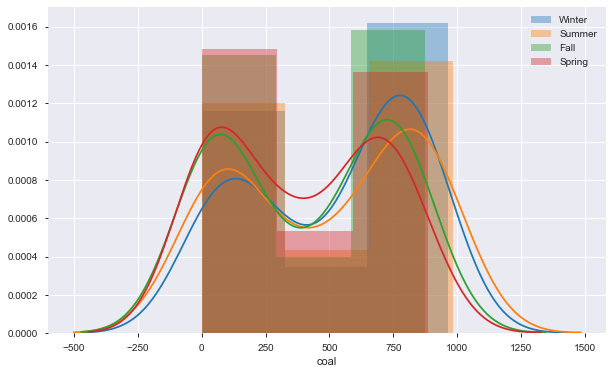

In [72]:
plt.figure(figsize=(10,6))
petcoke = sns.distplot(ny['coal'].loc[(ny.month==12)|(ny.month==1)|(ny.month==2)], label = 'Winter')
petcoke = sns.distplot(ny['coal'].loc[(ny.month==6)|(ny.month==7)|(ny.month==8)], label = 'Summer')
natgas = sns.distplot(ny['coal'].loc[(ny.month==9)|(ny.month==10)|(ny.month==11)], label = 'Fall')
natgas = sns.distplot(ny['coal'].loc[(ny.month==3)|(ny.month==4)|(ny.month==5)], label = 'Spring')
plt.legend(facecolor = 'white')

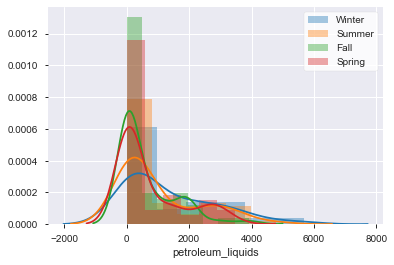

In [74]:
petcoke = sns.distplot(ny['petroleum_liquids'].loc[(ny.month==12)|(ny.month==1)|(ny.month==2)], label = 'Winter')
petcoke = sns.distplot(ny['petroleum_liquids'].loc[(ny.month==6)|(ny.month==7)|(ny.month==8)], label = 'Summer')
natgas = sns.distplot(ny['petroleum_liquids'].loc[(ny.month==9)|(ny.month==10)|(ny.month==11)], label = 'Fall')
natgas = sns.distplot(ny['petroleum_liquids'].loc[(ny.month==3)|(ny.month==4)|(ny.month==5)], label = 'Spring')
plt.legend(facecolor = 'white', frameon=True)

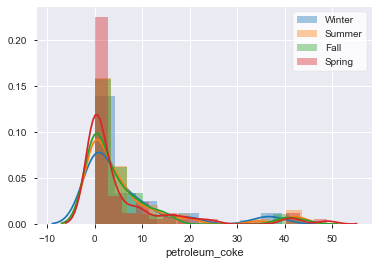

In [75]:
petcoke = sns.distplot(ny['petroleum_coke'].loc[(ny.month==12)|(ny.month==1)|(ny.month==2)], label = 'Winter')
petcoke = sns.distplot(ny['petroleum_coke'].loc[(ny.month==6)|(ny.month==7)|(ny.month==8)], label = 'Summer')
natgas = sns.distplot(ny['petroleum_coke'].loc[(ny.month==9)|(ny.month==10)|(ny.month==11)], label = 'Fall')
natgas = sns.distplot(ny['petroleum_coke'].loc[(ny.month==3)|(ny.month==4)|(ny.month==5)], label = 'Spring')
plt.legend(facecolor = 'white', frameon=True)

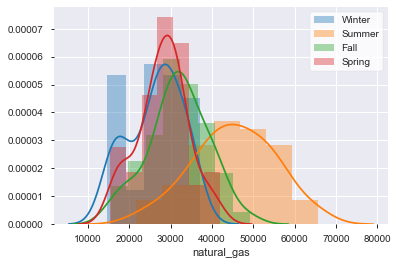

In [76]:
natgas = sns.distplot(ny['natural_gas'].loc[(ny.month==12)|(ny.month==1)|(ny.month==2)], label = 'Winter')
natgas = sns.distplot(ny['natural_gas'].loc[(ny.month==6)|(ny.month==7)|(ny.month==8)], label = 'Summer')
natgas = sns.distplot(ny['natural_gas'].loc[(ny.month==9)|(ny.month==10)|(ny.month==11)], label = 'Fall')
natgas = sns.distplot(ny['natural_gas'].loc[(ny.month==3)|(ny.month==4)|(ny.month==5)], label = 'Spring')
plt.legend(facecolor = 'white', frameon=True)